# What do your blood sugars tell you?

## 📖 Background

Diabetes mellitus remains a global health issue, causing several thousand people to die each day from this single condition. Finding and avoiding diabetes in the earlier stages can help reduce the risk of serious health issues such as circulatory system diseases, kidney malfunction, and vision loss.

The goal of this project was developing a predictive model for effectively detecting potential Diabetes cases, ideally, before commencing preventive treatment.




## Summary
This project applies a data-driven methodology to create a predictive model to effectively detect potential cases of diabetes. In the first step, the most important factors that affect the outcome of diabetes are determined. The second step was to create interactive graphs to visualize the relationship between diabetes and the factors determined from the previous step. Then, some classification models were applied and the best performing model was using DecisionTreeClassifier. And in the end, we applied this model to identify the risk of a 54-year-old person, length 178 cm and weight 96 kg, and glucose levels of 125 mg/dL of having diabetes.

## 💾 The data

The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling.

The columns and Data Types are as follows:

- Pregnancies
Type: Numerical (Continuous)
Description: Number of times the patient has been pregnant.

- Glucose
Type: Numerical (Continuous)
Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure
Type: Numerical (Continuous)
Description: Diastolic blood pressure (mm Hg).

- SkinThickness
Type: Numerical (Continuous)
Description: Triceps skinfold thickness (mm).

- Insulin
Type: Numerical (Continuous)
Description: 2-Hour serum insulin (mu U/ml).

- BMI
Type: Numerical (Continuous)
Description: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction
Type: Numerical (Continuous)
Description: A function that represents the likelihood of diabetes based on family history.

- Age
Type: Numerical (Continuous)
Description: Age of the patient in years.

- Outcome
Type: Categorical (Binary)
Description: Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

### Findings
Some columns were identified with dirt values: SkinThickness, BloodPressure, Pregnancies, Insulin, BMI and Glucose. They were causing outliers and skewing the data.  

The first approach was to impute data, but it was much more than 5%. So, after analyzing the most important factors, we decided to work only with the most important features. Even so, it was necessary to remove some values ​​from the columns: BMI and Glucose, but for these the number of dirty/nan rows was less than 5%.

This treatment had a noticeable positive impact in the accuracy of the model as you can in section.

## The factors affecting the diabetes outcome.
The most important features to guid the model to predict potential diabetes cases was identified in this order:
1. BMI
2. Glucose
3. Age

## The Models
The DecisionTreeClassifier achieved the best results after applied hyperparameters.

### Best results:
- Decision Tree Classifier: 
    - Accuracy: 0.84
    - Precision: 0.78
    - Recall: 0.77
    - F1-Score: 0.78
    - ROC AUC: 0.86

## The Prediction Case
The following data was given to predict if the patient A has diabetes:
-  Age: 54
-  Weight: 96 kg
-  Height: 1,78
-  Glucose: 125 mg/dL

After apply to the best model, the result was:
- 57% of probability of outcome 1 for the patient A (diabetes)
- Model Precision: 78%



# Exporatory Data Analysis (EAD)

In [1]:
import pandas as pd

data = pd.read_csv('data/diabetes.csv')
# Display the first few rows of the DataFrame
print(data.head())
print(data.info())


   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-n

In [2]:
data.shape

(768, 9)

## Checking Missing Data

In [3]:
print(f"The dataset contains {len(data)} rows and there is no  NAN missing data: \n")
print(data.isna().sum())

The dataset contains 768 rows and there is no  NAN missing data: 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Checking for Outliers
The code below checks for outliers, displays them in graphs, and prints the values for analysis.

- The best F1-Score [achived]() before clean the outliers was 0.61
- After the outliers have been clened, it comes up to 0.78

### Boxplots for All Numeric Columns

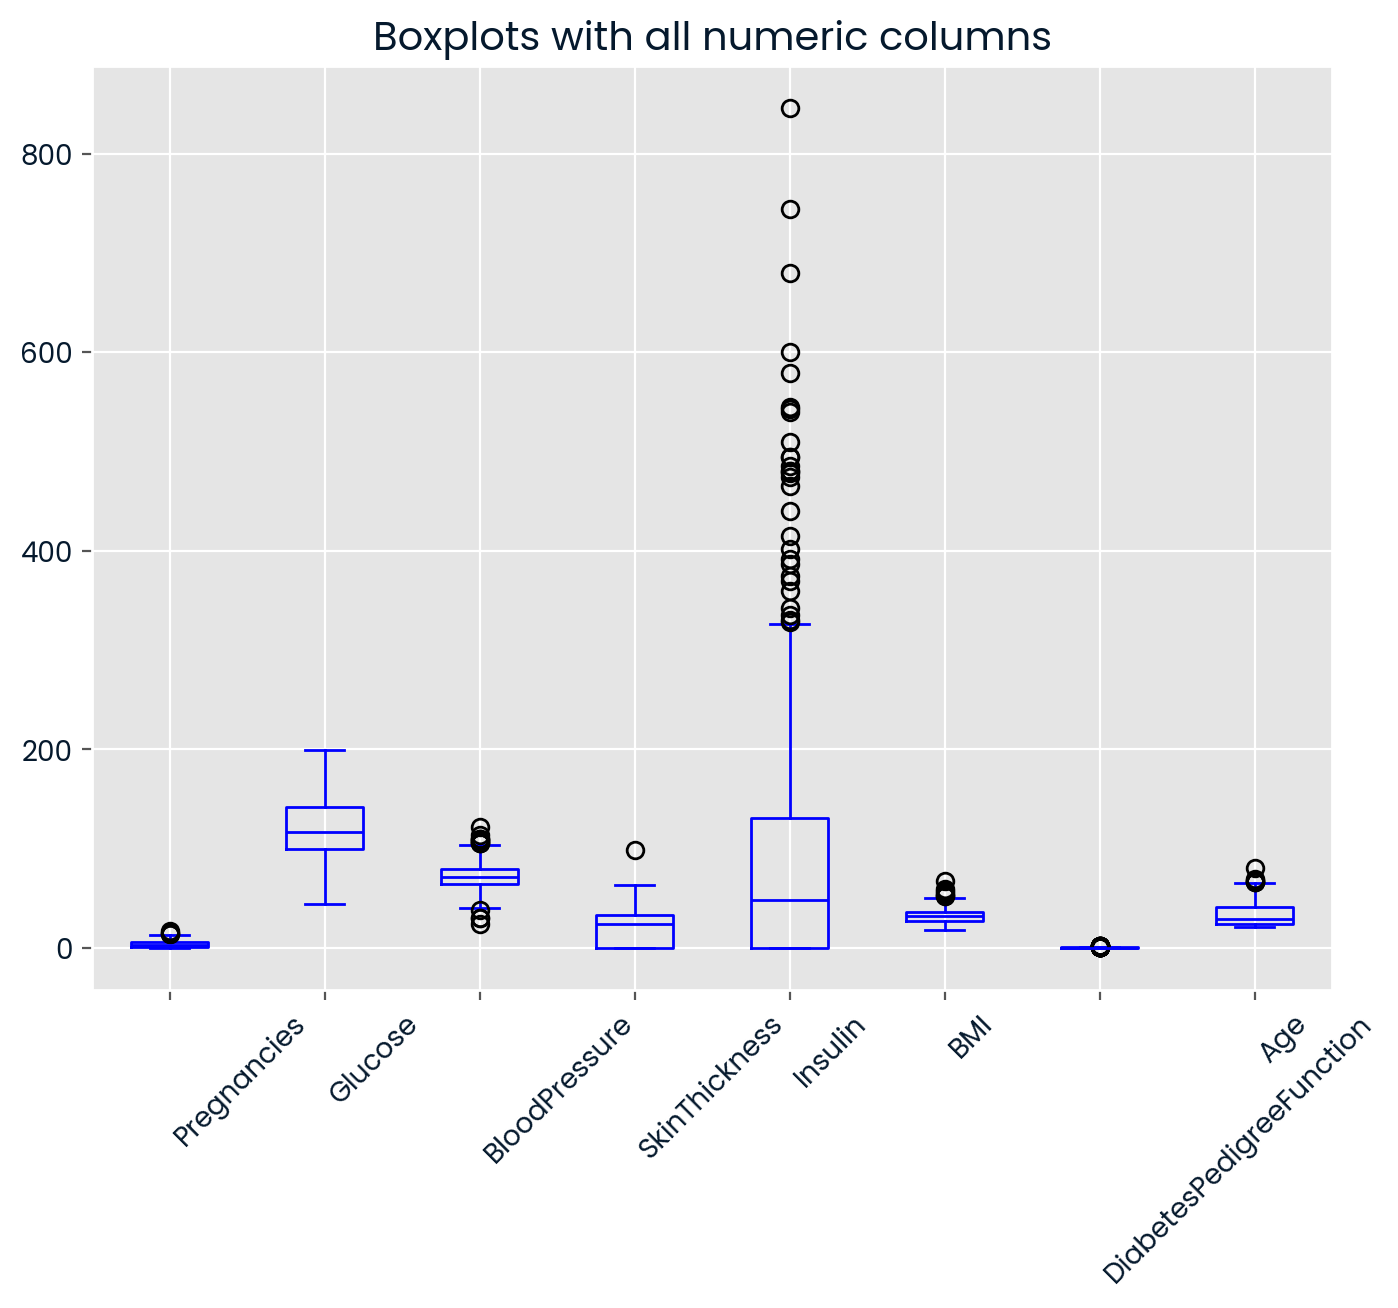

### Analysis Box-plot Insulin

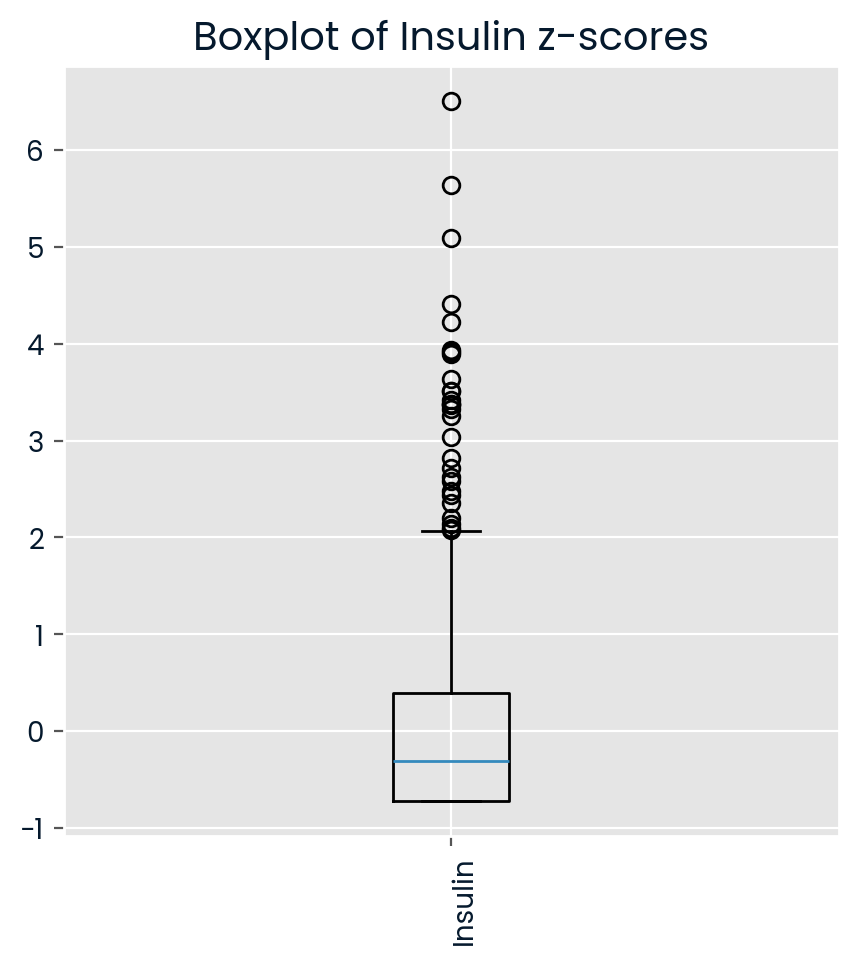

#### Outliers from Insulin:

|   Insulin |   Outcome |
|----------:|----------:|
|       440 |         0 |
|       465 |         1 |
|       474 |         1 |
|       478 |         1 |
|       480 |         0 |
|       480 |         1 |
|       485 |         0 |
|       495 |         1 |
|       495 |         1 |
|       510 |         1 |
|       540 |         1 |
|       543 |         1 |
|       545 |         0 |
|       579 |         1 |
|       600 |         1 |
|       680 |         0 |
|       744 |         0 |
|       846 |         1 |

### Analysis Box-plot Age

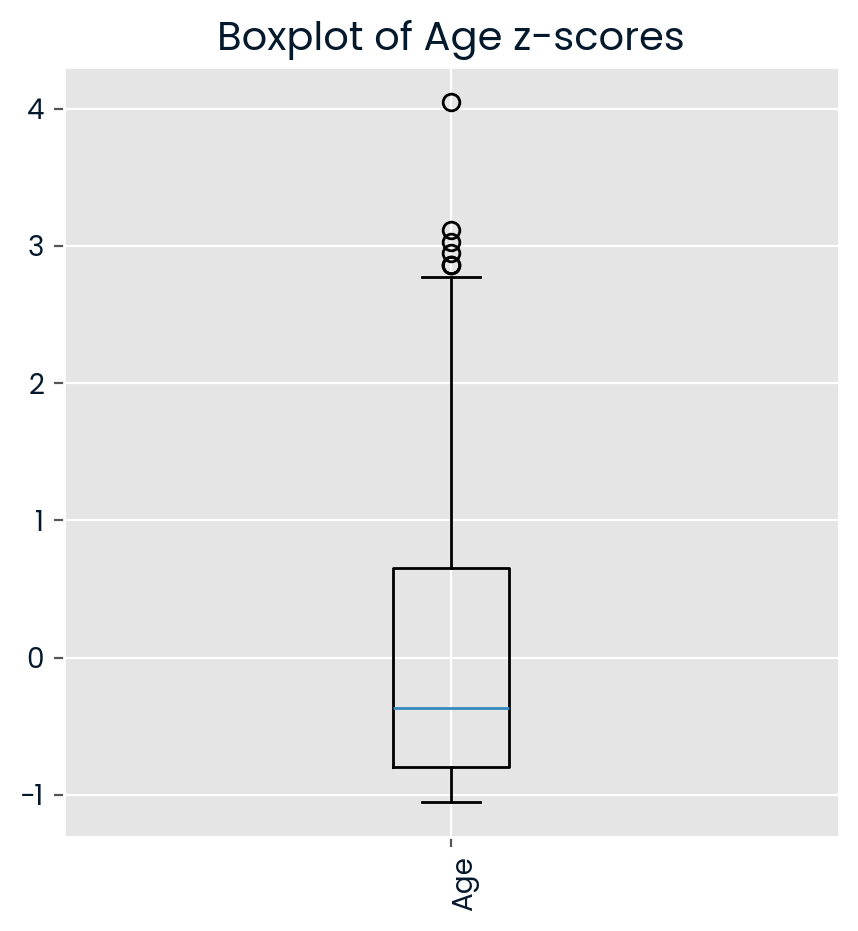

#### Outliers from Age:

|   Age |   Outcome |
|------:|----------:|
|    69 |         0 |
|    70 |         1 |
|    81 |         0 |

### Analysis Box-plot Glucose

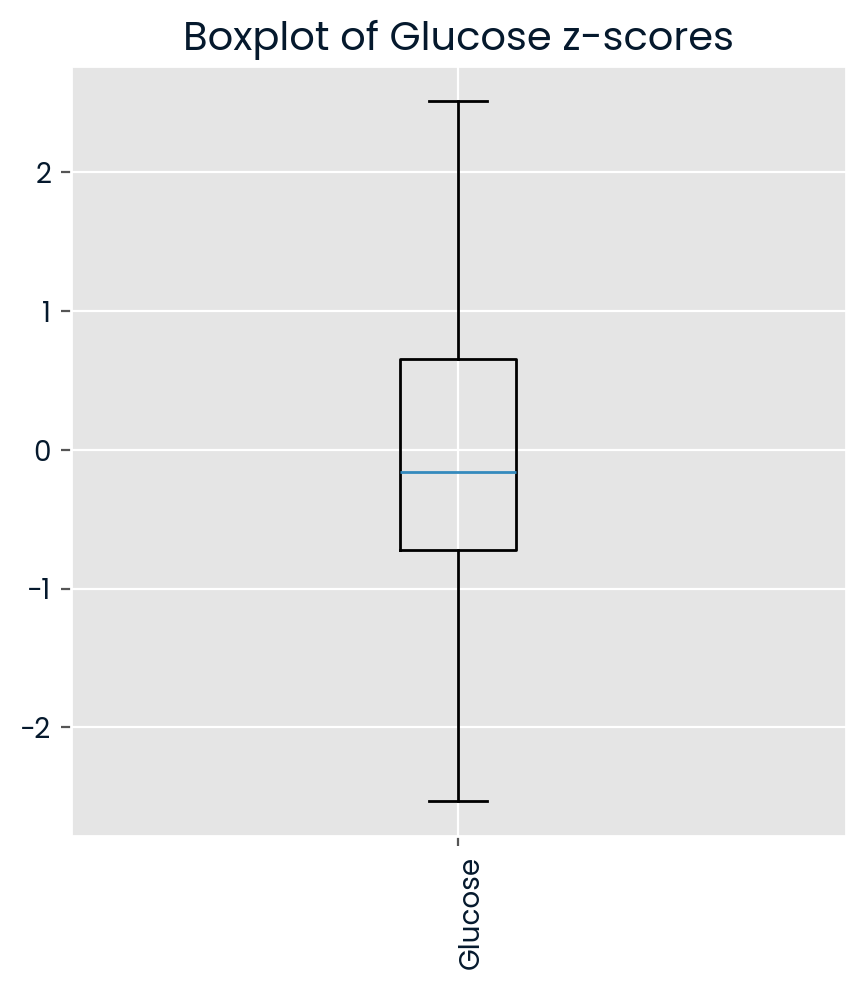

#### Outliers from Glucose:

| Glucose   | Outcome   |
|-----------|-----------|

### Analysis Box-plot SkinThickness

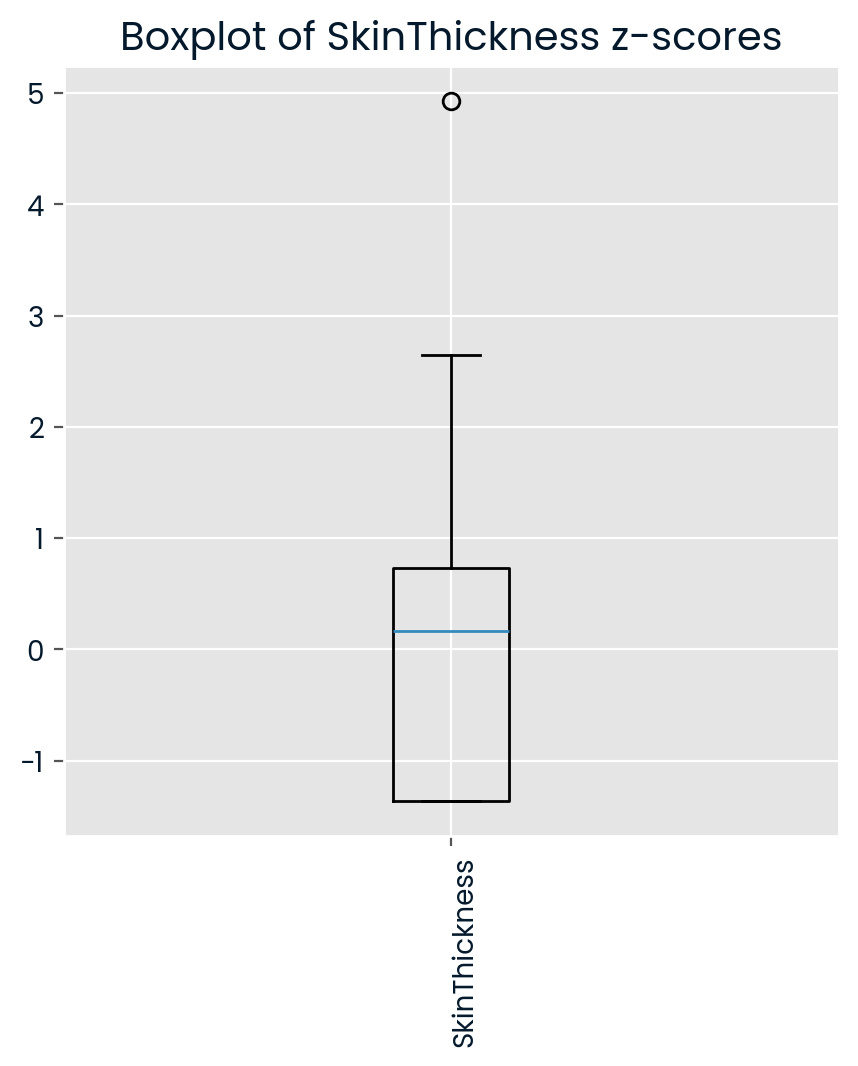

#### Outliers from SkinThickness:

|   SkinThickness |   Outcome |
|----------------:|----------:|
|              99 |         1 |

### Analysis Box-plot BloodPressure

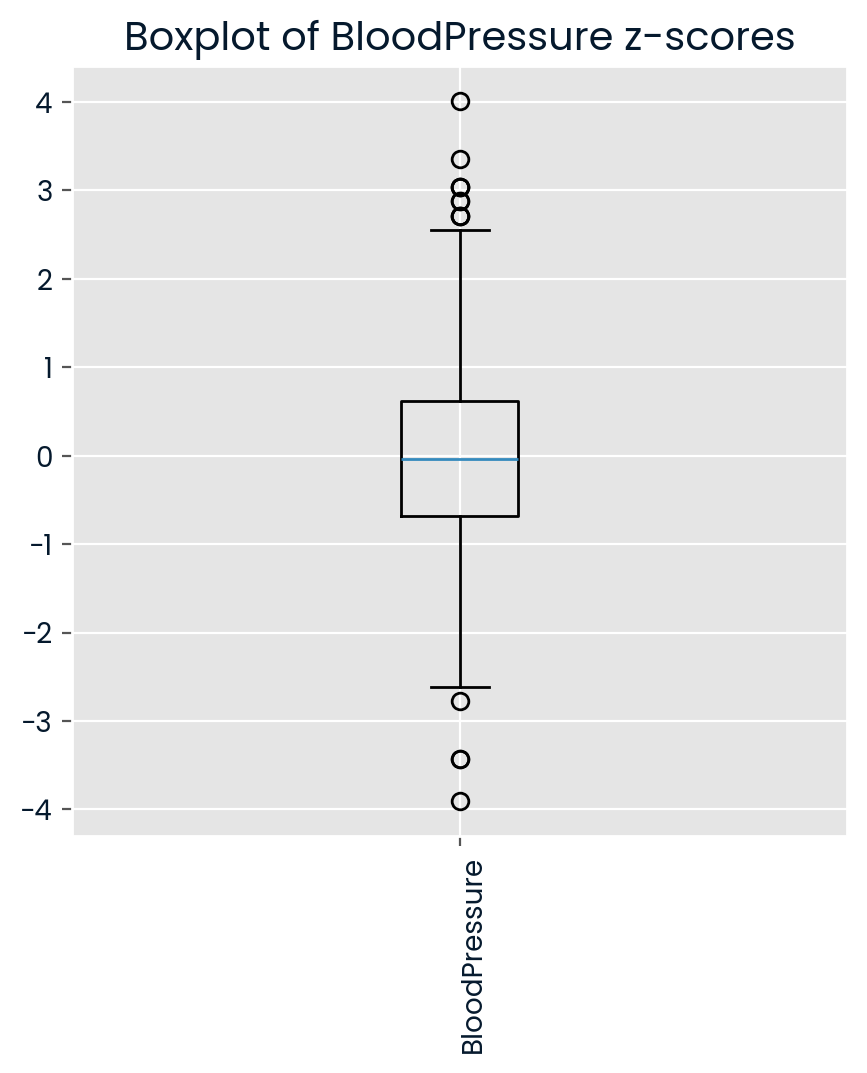

#### Outliers from BloodPressure:

|   BloodPressure |   Outcome |
|----------------:|----------:|
|              24 |         0 |
|              30 |         0 |
|              30 |         1 |
|             110 |         1 |
|             110 |         1 |
|             110 |         0 |
|             114 |         1 |
|             122 |         0 |

### Analysis Box-plot DiabetesPedigreeFunction

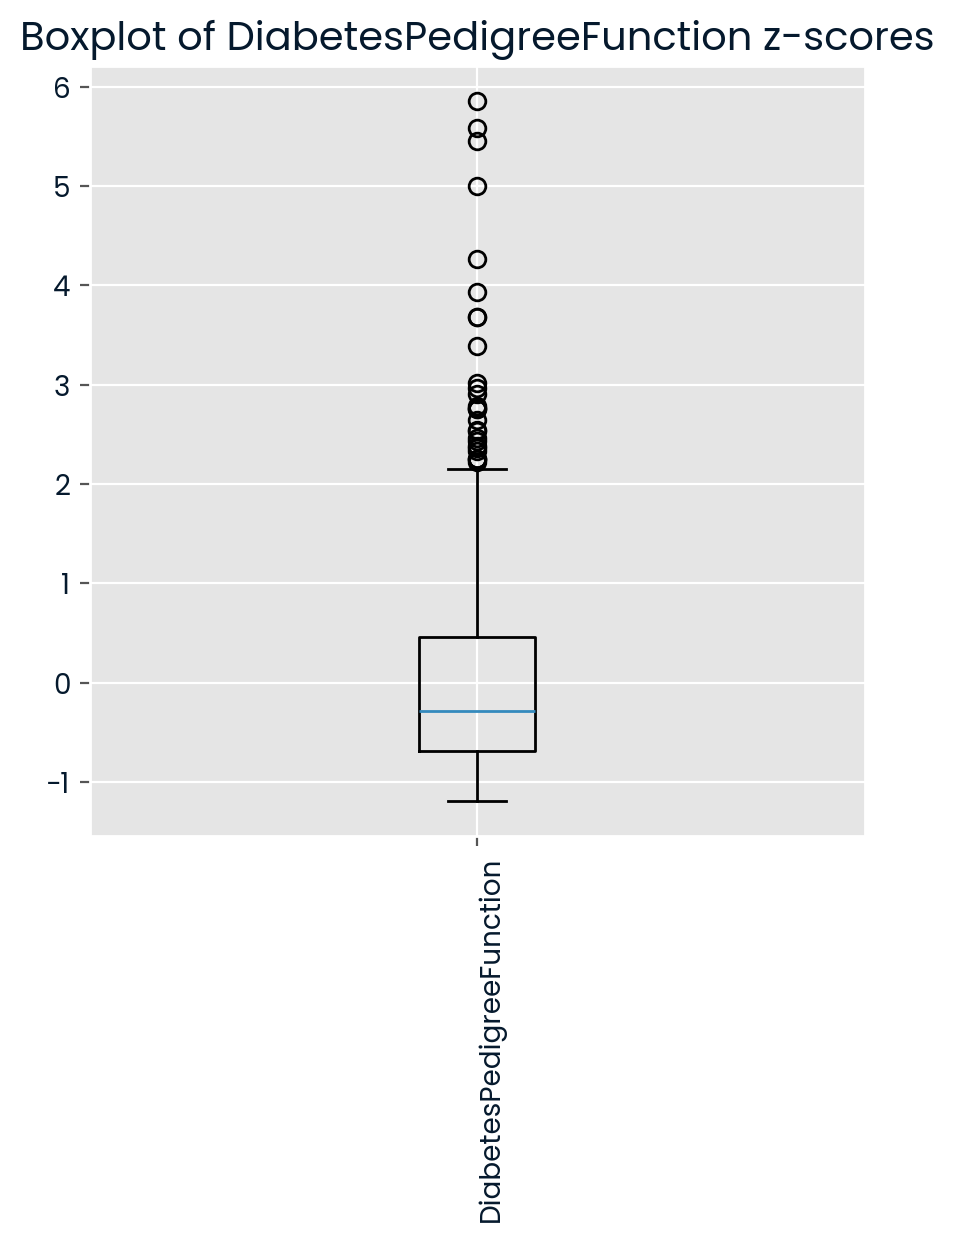

#### Outliers from DiabetesPedigreeFunction:

|   DiabetesPedigreeFunction |   Outcome |
|---------------------------:|----------:|
|                      1.476 |         0 |
|                      1.6   |         0 |
|                      1.698 |         0 |
|                      1.699 |         0 |
|                      1.781 |         0 |
|                      1.893 |         1 |
|                      2.137 |         1 |
|                      2.288 |         1 |
|                      2.329 |         0 |
|                      2.42  |         1 |

### Analysis Box-plot BMI

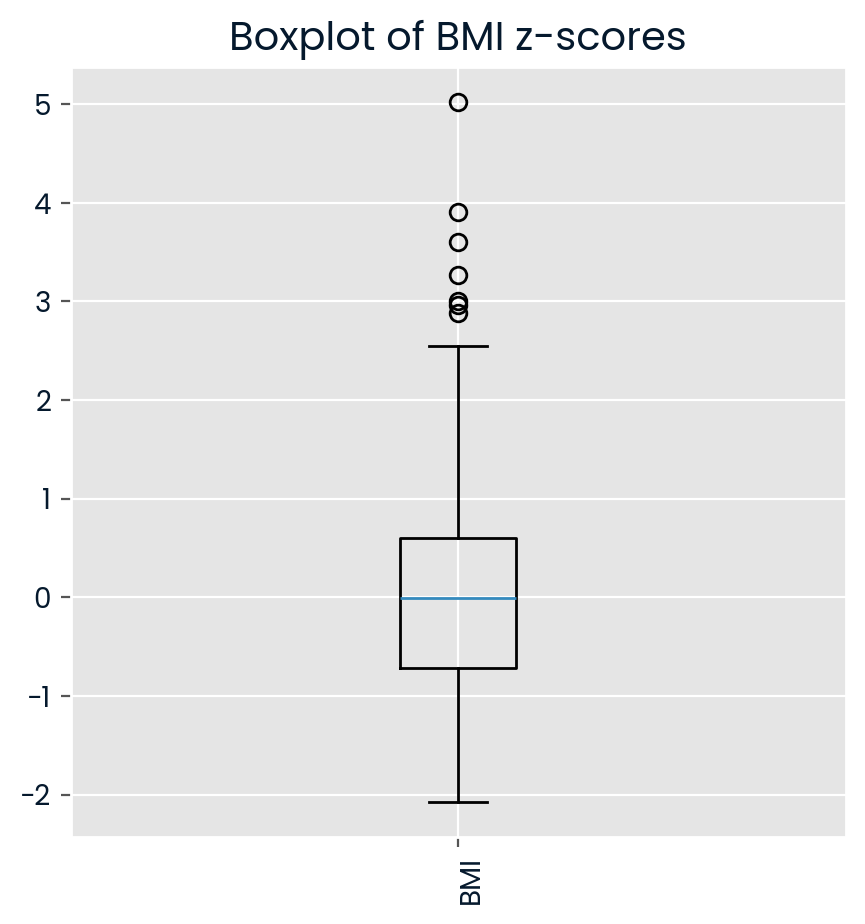

#### Outliers from BMI:

|   BMI |   Outcome |
|------:|----------:|
|  53.2 |         1 |
|  55   |         1 |
|  57.3 |         0 |
|  59.4 |         1 |
|  67.1 |         1 |

### Analysis Box-plot Pregnancies

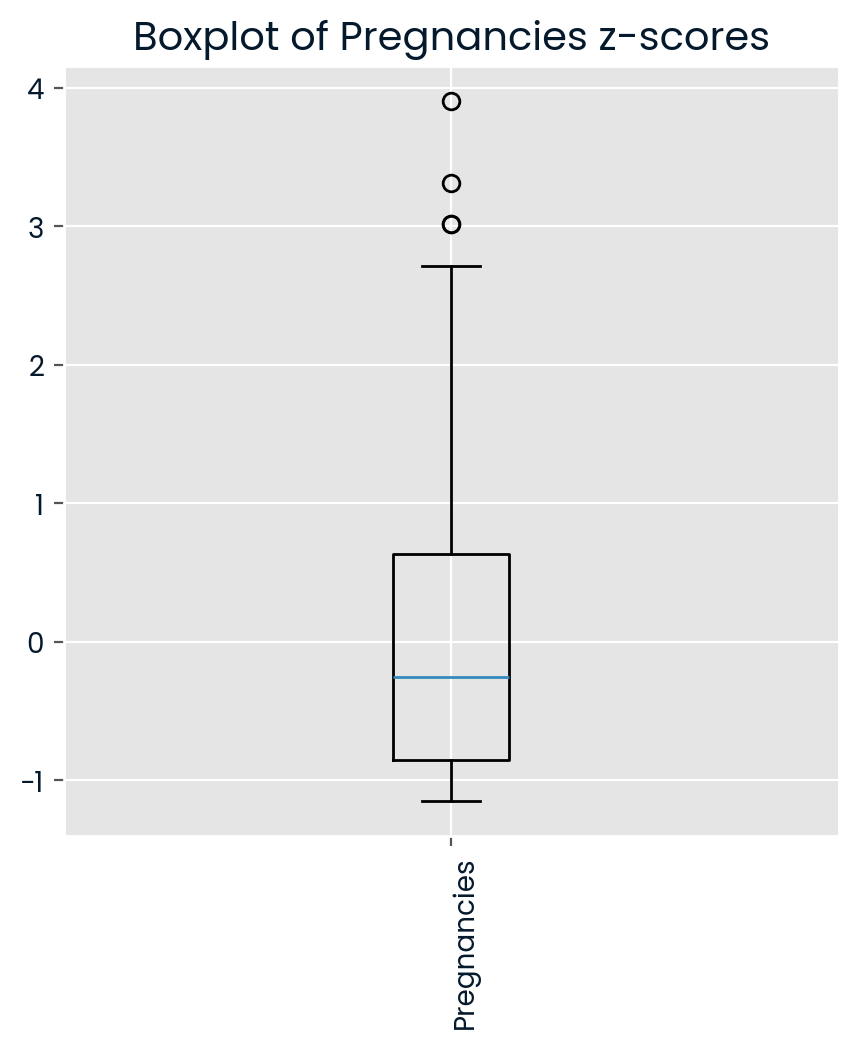

#### Outliers from Pregnancies:

|   Pregnancies |   Outcome |
|--------------:|----------:|
|            14 |         1 |
|            14 |         1 |
|            15 |         1 |
|            17 |         1 |

### Cleaning invalid data that was causing outliers:

- 0 rows/724 were deleted from Glucose column with value 0.

- 0 rows/724 were deleted from BMI column with value 0.

- 0 rows/724 were deleted from BloodPressure column with value 0.

- The best F1-Score achieved before cleaning these outliers was 0.61

- After cleaning these outliers it comes up to 0.78

### Pairplot (scatter)

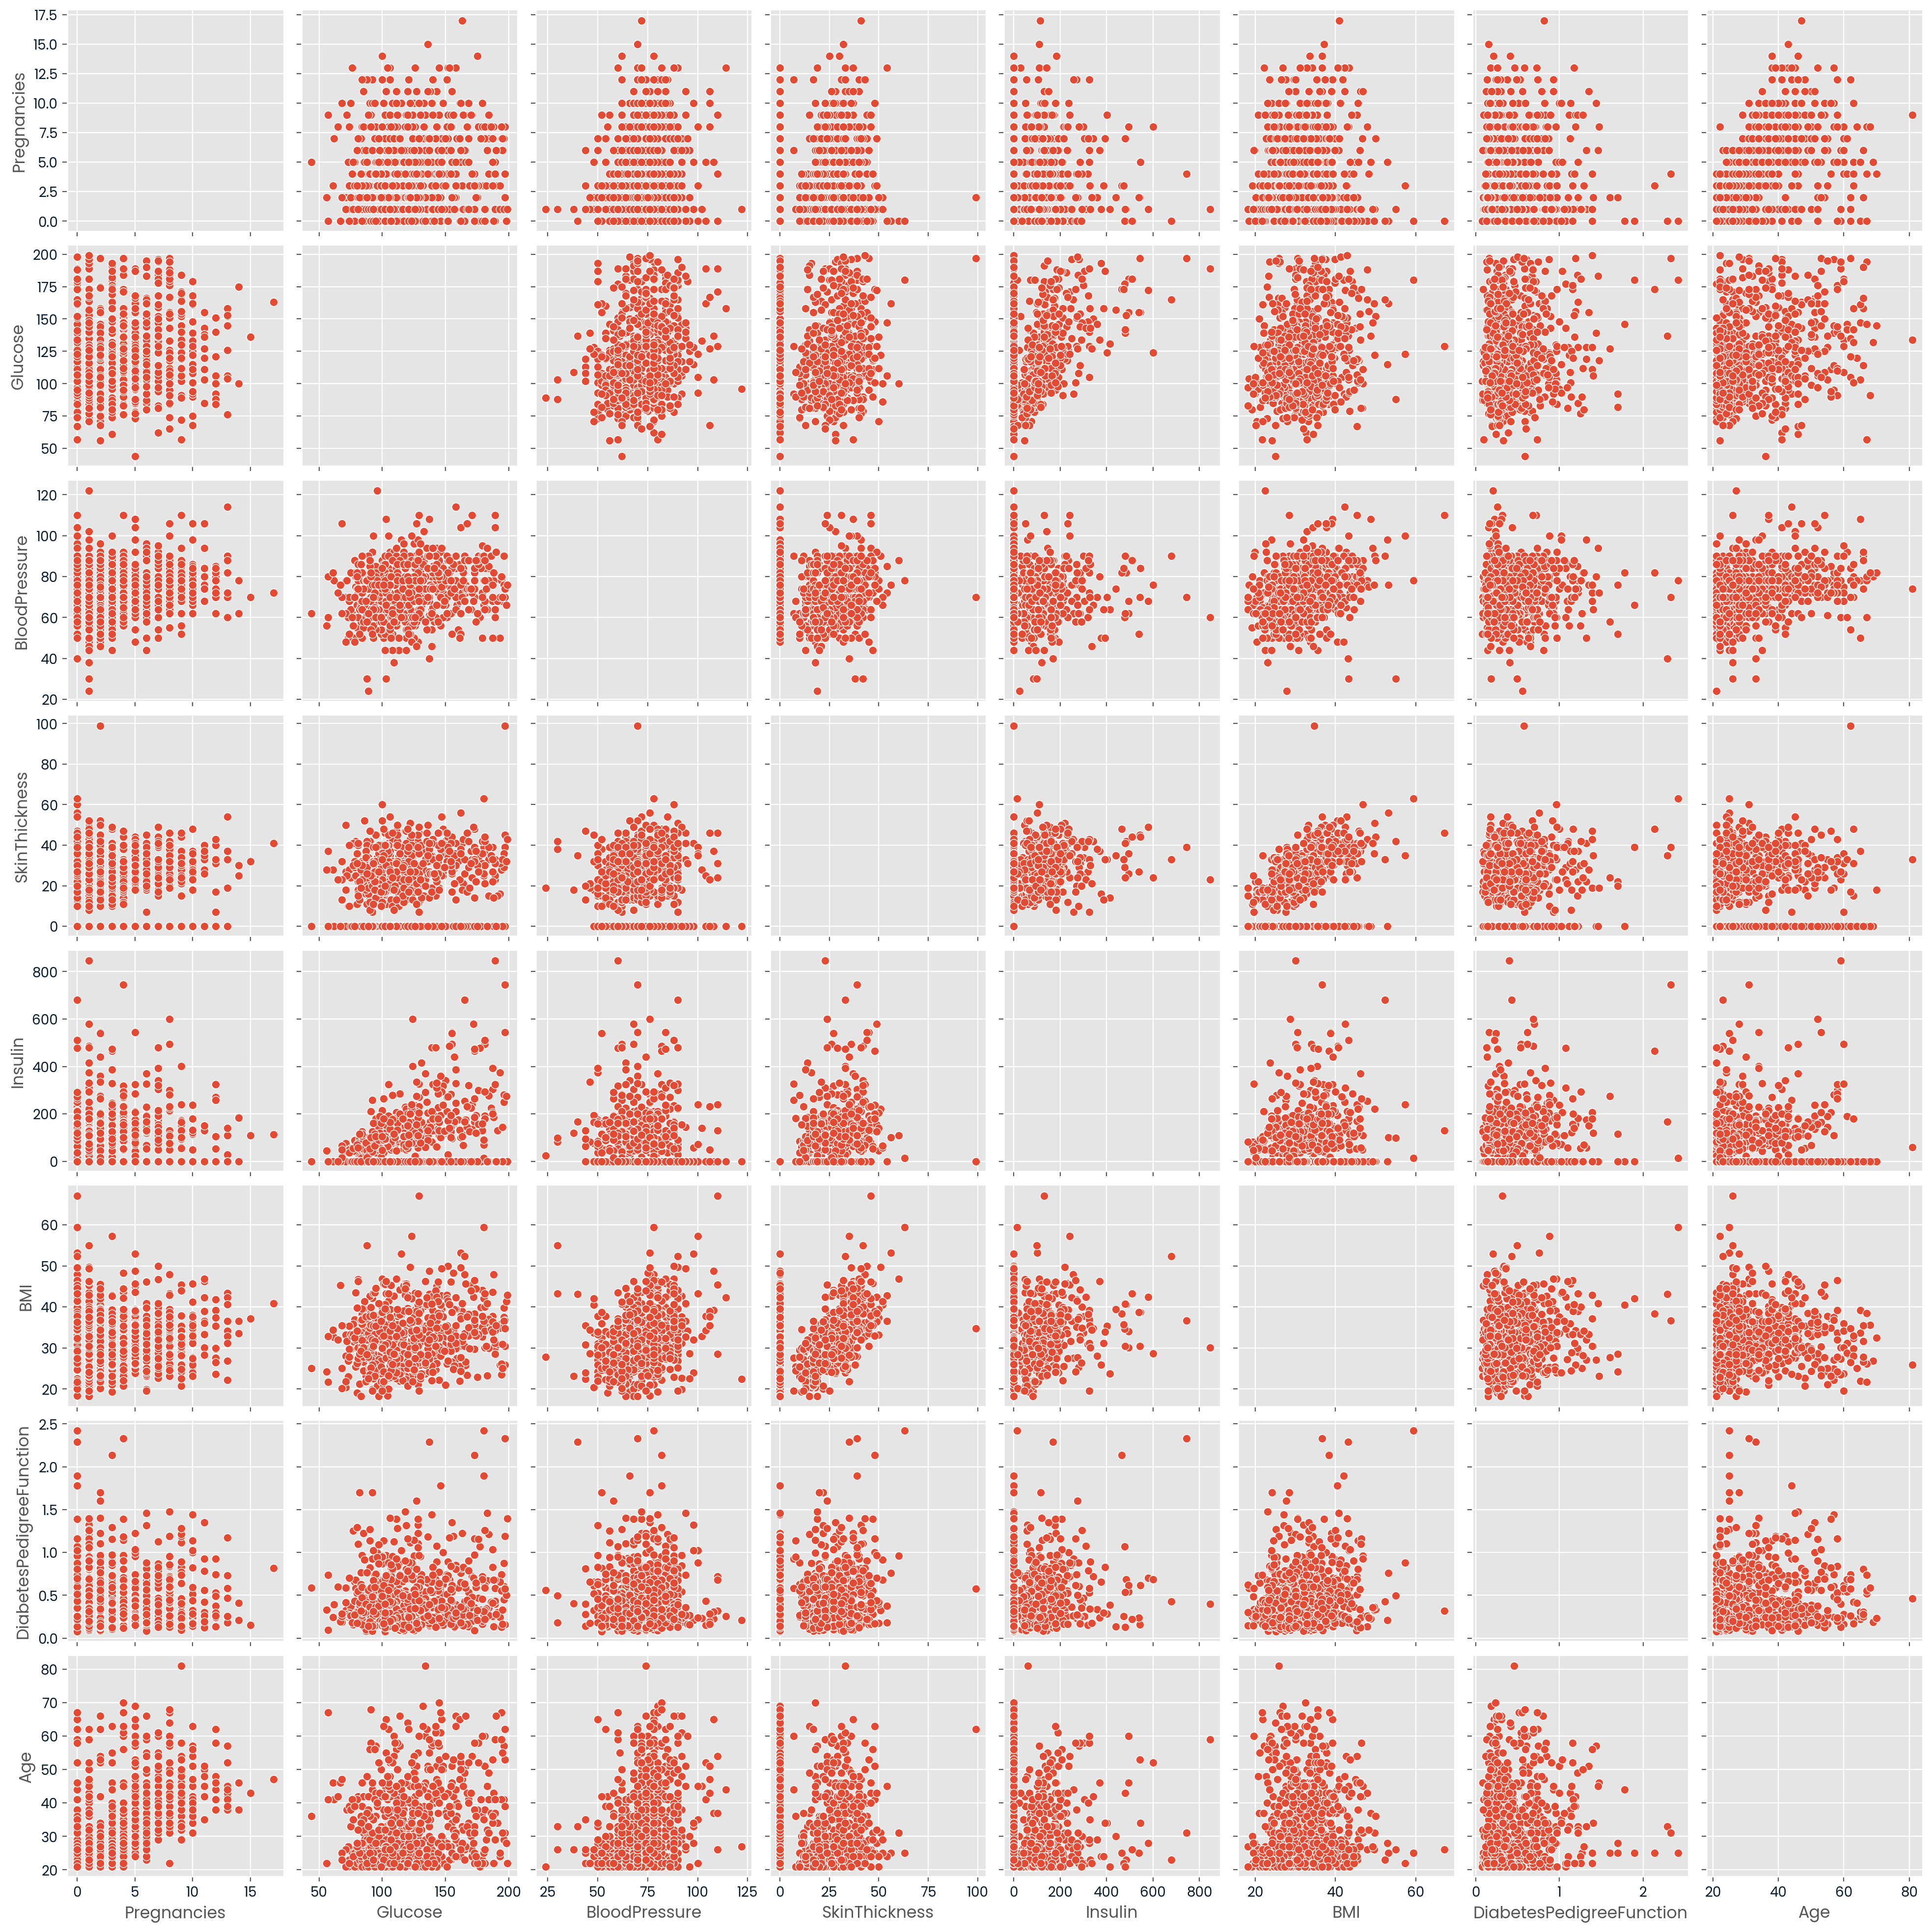

<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Ensure 'Outcome' is treated as a categorical variable
data['Outcome'] = data['Outcome'].astype('category')

plt.style.use('ggplot')

# Function to plot boxplot from all columns
def plot_boxplots(dataframe):
    """
    Plot boxplots for all numeric columns in a given DataFrame

    Args:
        dataframe: the DataFrame with data
    """
    display(Markdown("### Boxplots for All Numeric Columns"))
    num_cols = dataframe.select_dtypes(include=['number']).columns
    dataframe[num_cols].boxplot(figsize=(8,6))
    plt.title('Boxplots with all numeric columns')
    plt.xticks(rotation=45, ha='left')
    plt.show()

# Function to calculate z-scores and show outliers
def calculate_z_scores_and_show_outliers(dataframe, column):
    """
    Function to calculate z-scores and show outliers

    Args:
        dataframe: dateframe with data.
        column: the column to calculate the z-scores.
    """
    dataframe[f'z_score_{column}'] = (dataframe[column] - dataframe[column].mean()) / dataframe[column].std()
    
    # Creating a figure with subplots
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    # Plotting boxplot
    display(Markdown(f"### Analysis Box-plot {column}"))
    ax.boxplot(dataframe[f'z_score_{column}'])
    ax.set_title(f'Boxplot of {column} z-scores')
    ax.set_xticklabels([column], rotation=90, ha='left')
    
    # Identifying outliers (z-score > 3)
    outliers = dataframe[abs(dataframe[f'z_score_{column}']) > 3]
    
    plt.show()
    
    # Displaying outliers in markdown table
    outliers_markdown = outliers[[column, 'Outcome']].sort_values(by=column).to_markdown(index=False)
    display(Markdown(f"#### Outliers from {column}:\n\n{outliers_markdown}"))
    
    dataframe = dataframe.drop(f'z_score_{column}', axis=1)
    
    return dataframe

# Ploting boxplots for all numeric columns
plot_boxplots(data)

# Calculate z-scores and showing outliers
data = calculate_z_scores_and_show_outliers(data, 'Insulin')
data = calculate_z_scores_and_show_outliers(data, 'Age')
data = calculate_z_scores_and_show_outliers(data, 'Glucose')
data = calculate_z_scores_and_show_outliers(data, 'SkinThickness')
data = calculate_z_scores_and_show_outliers(data, 'BloodPressure')
data = calculate_z_scores_and_show_outliers(data, 'DiabetesPedigreeFunction')
data = calculate_z_scores_and_show_outliers(data, 'BMI')
data = calculate_z_scores_and_show_outliers(data, 'Pregnancies')

# Cleaning invalid outliers/data
display(Markdown("### Cleaning invalid data that was causing outliers:"))
display(Markdown(f"- {len(data[data['Glucose']==0])} rows/{len(data)} were deleted from Glucose column with value 0."))
display(Markdown(f"- {len(data[data['BMI']==0])} rows/{len(data)} were deleted from BMI column with value 0."))
display(Markdown(f"- {len(data[data['BloodPressure']==0])} rows/{len(data)} were deleted from BloodPressure column with value 0."))

display(Markdown("- The best F1-Score achieved before cleaning these outliers was 0.61"))
display(Markdown("- After cleaning these outliers it comes up to 0.78"))

data = data[~(data["Glucose"]==0)]
data = data[~(data["BMI"]==0)]
data = data[~(data["BloodPressure"]==0)]

# Pairplotting 
display(Markdown("### Pairplot (scatter)"))
sns.pairplot(data, diag_kind="scatter")
plt.show()
plt.clf()

## Visualizing the data distribution of glucose

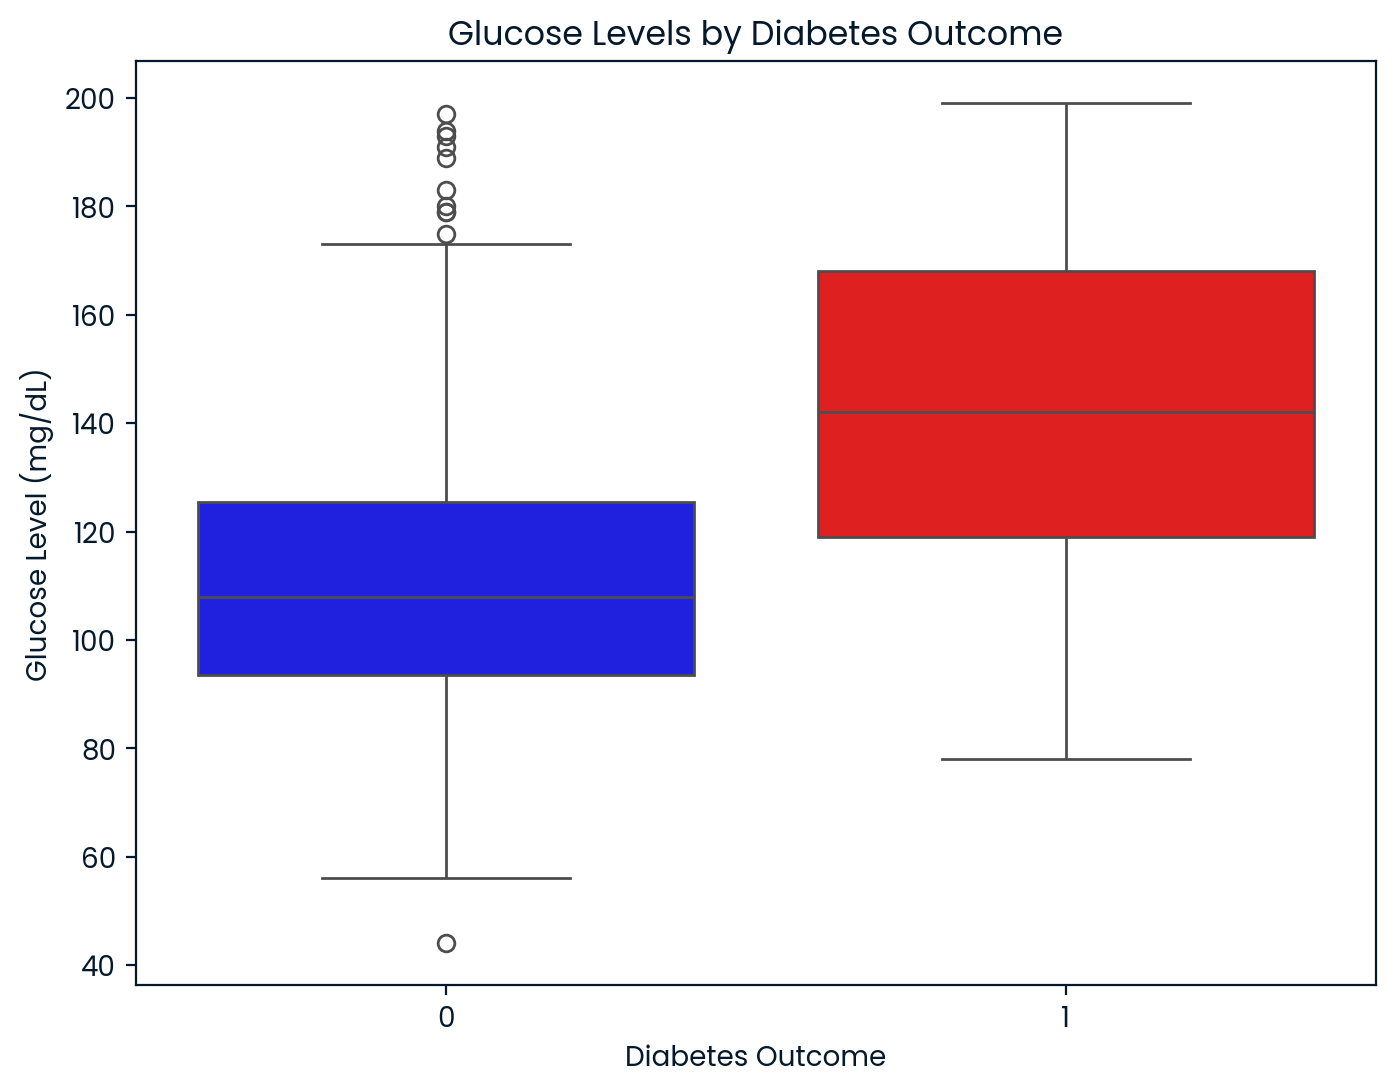

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Outcome' is treated as a categorical variable
data['Outcome'] = data['Outcome'].astype('category')

# Boxplot of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()


## Visualizing the age distribution

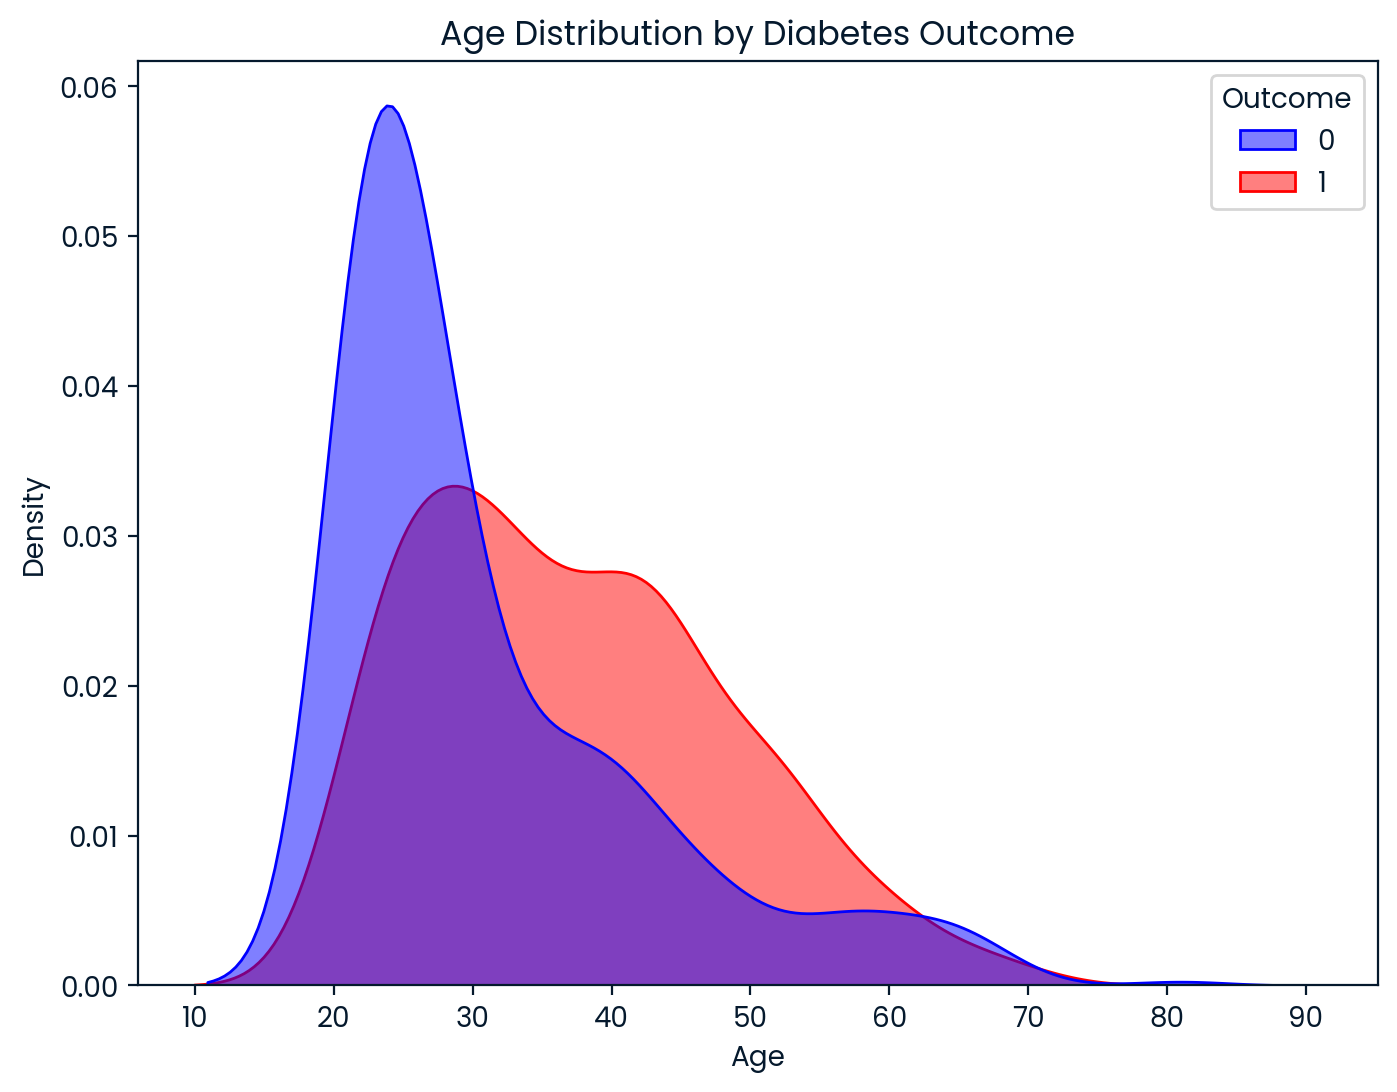

In [6]:
# Density plot of Age by Outcome
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Age', hue='Outcome', fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


## Visualizing Insuline Distribution

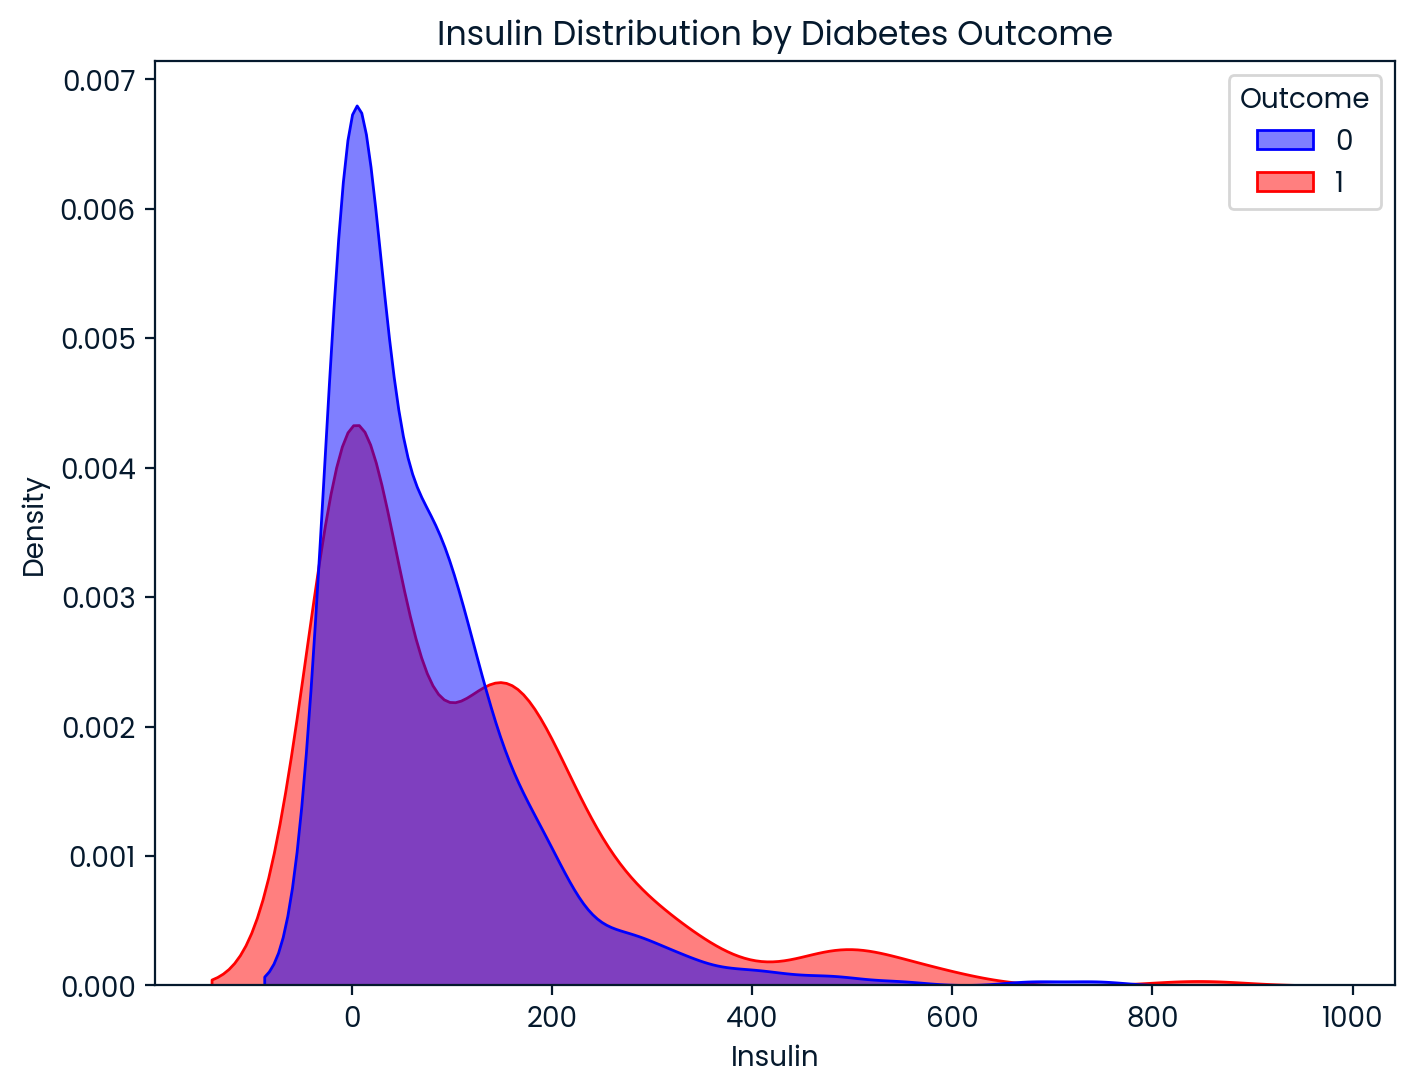

In [7]:
# Density plot of Age by Outcome
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Insulin', hue='Outcome', fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5)
plt.title("Insulin Distribution by Diabetes Outcome")
plt.xlabel("Insulin")
plt.ylabel("Density")
plt.show()


# The most important factors affecting the diabetes outcome

## Lasso Regression for Feature Importance

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[ 0.00000000e+00  6.58613903e-03  0.00000000e+00  0.00000000e+00
 -4.45031508e-05  7.79760196e-03  0.00000000e+00  3.10435989e-03]


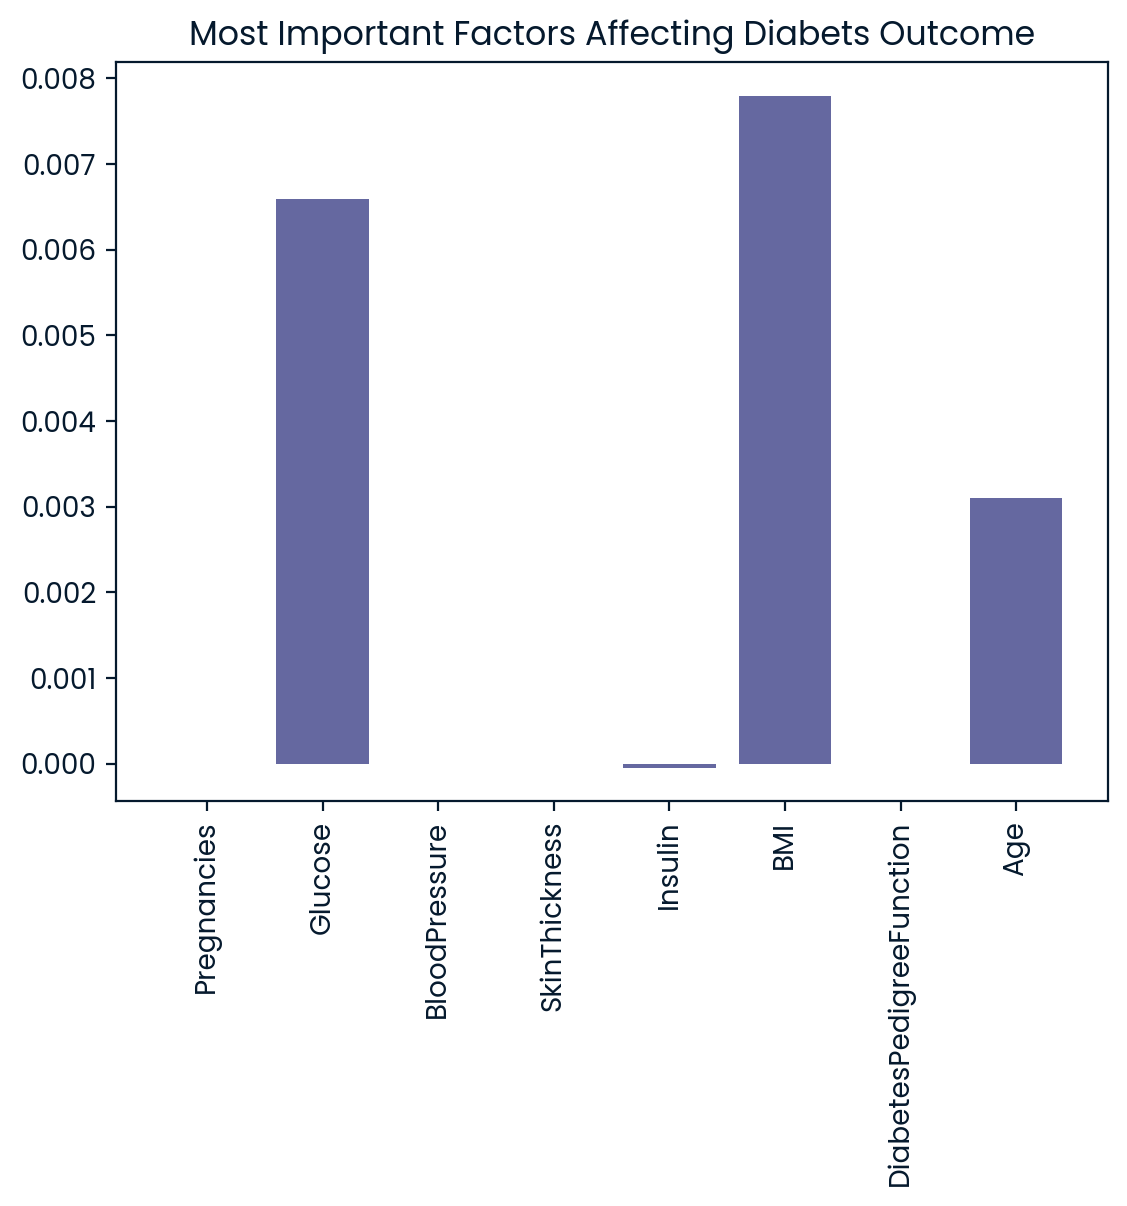

In [8]:
# Import Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

data_columns = data.drop(["Outcome"], axis=1).columns
print(list(data_columns))
X = data.drop(["Outcome"], axis=1).values.reshape(-1, 8) 
y = data["Outcome"].values

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(data_columns, lasso_coef)
plt.title("Most Important Factors Affecting Diabets Outcome")
plt.xticks(rotation=90)
plt.show()

## Correlation Matrix

                               Age       BMI
Pregnancies               0.557066  0.012342
Glucose                   0.263560  0.223276
BloodPressure             0.324897  0.287403
SkinThickness            -0.128908  0.401528
Insulin                  -0.049412  0.191831
BMI                       0.020835  1.000000
DiabetesPedigreeFunction  0.023098  0.154858
Age                       1.000000  0.020835
Outcome                   0.245741  0.299375


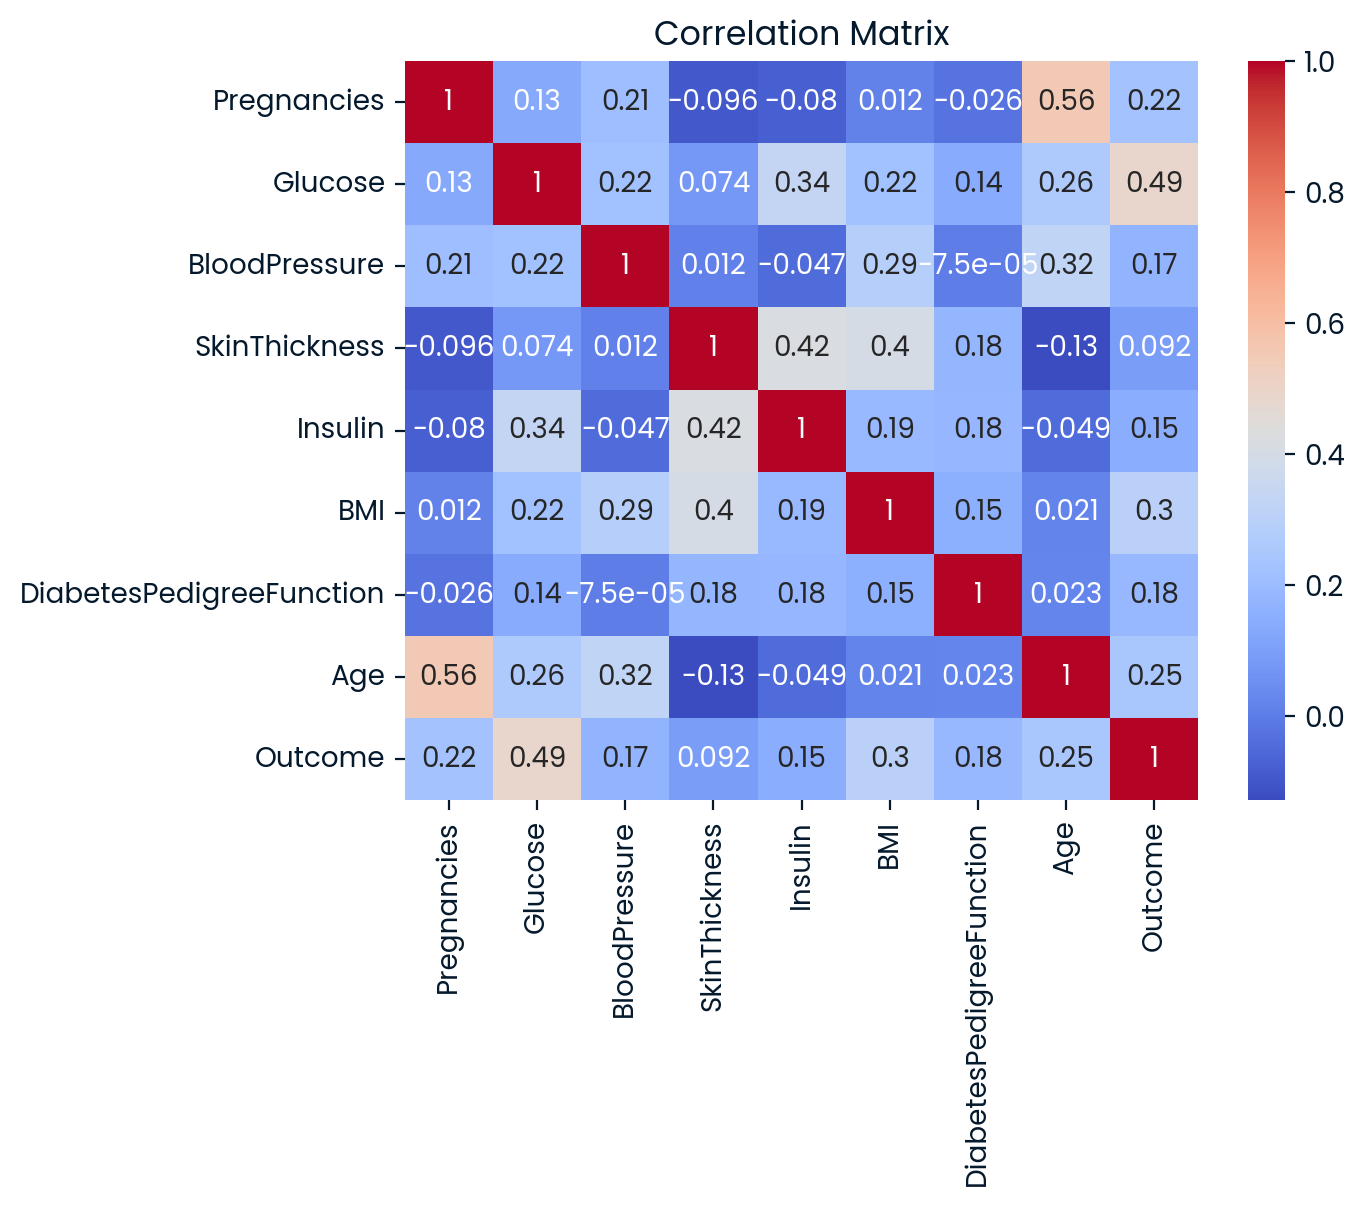

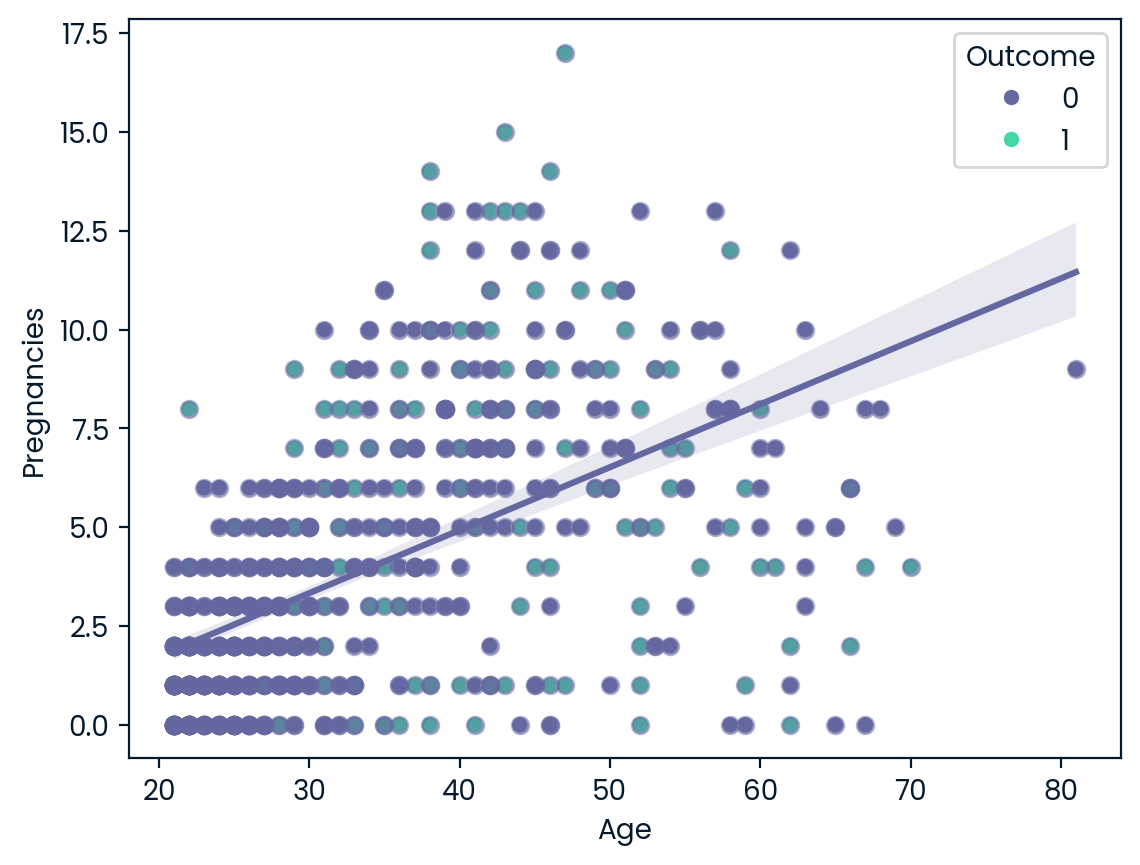

<Figure size 640x480 with 0 Axes>

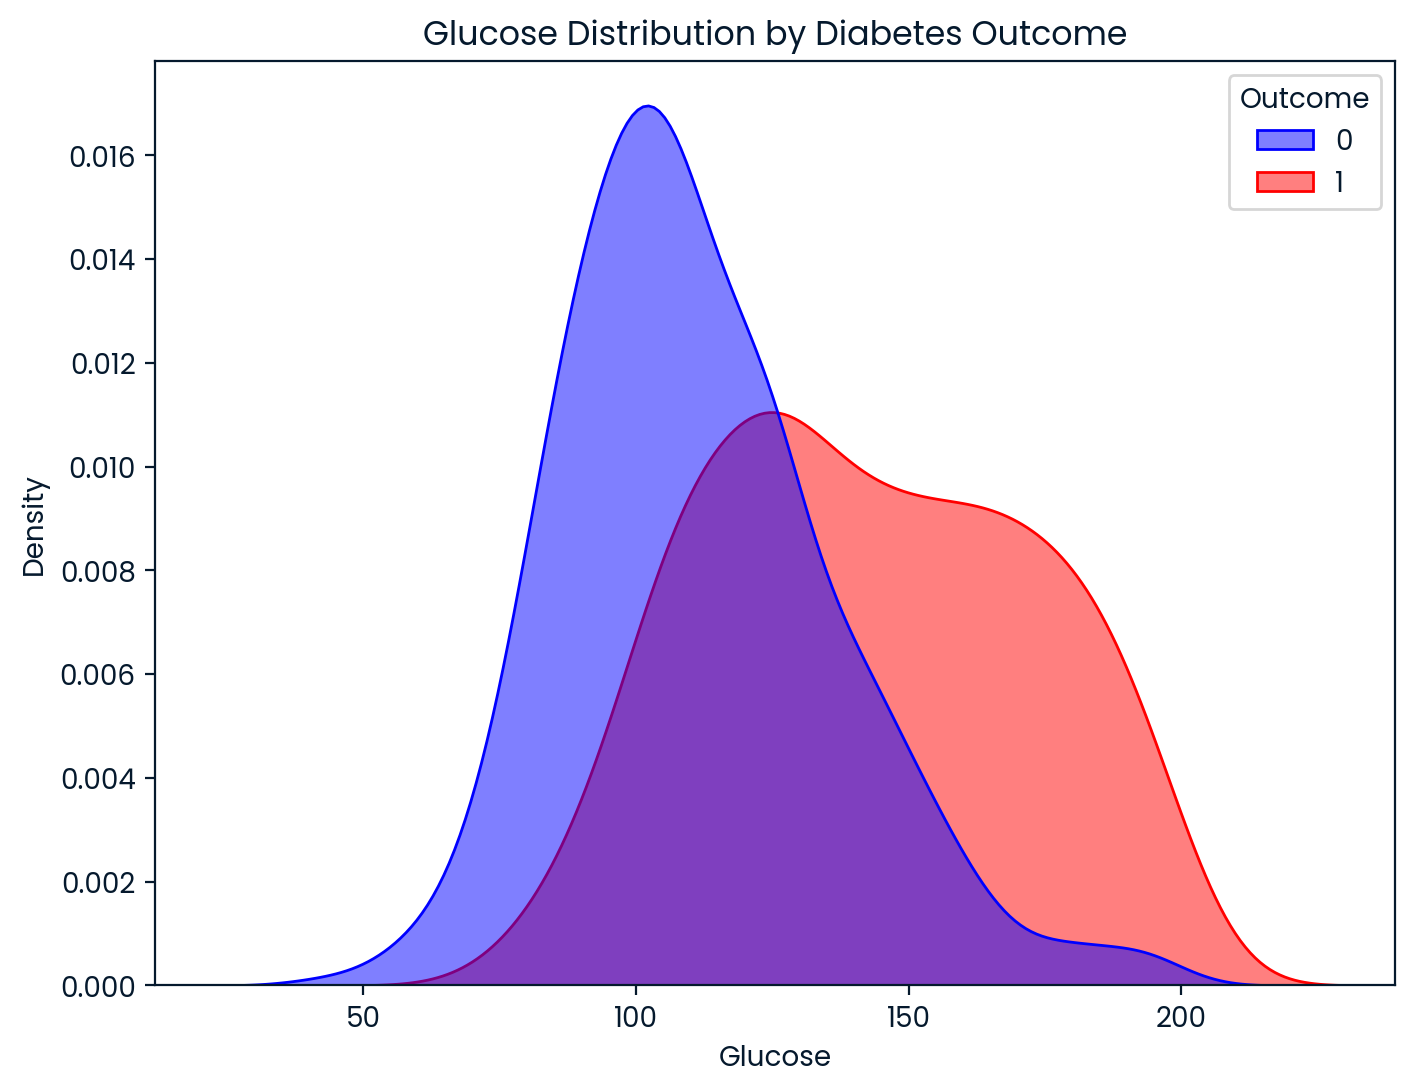

0.5570661458327673


In [9]:
corr_matrix = data.corr()
print(corr_matrix.loc[:,['Age', 'BMI']])

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
plt.clf()

#data['inter_preg_age'] = data['Pregnancies'] * data['Age']

sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=data)
sns.regplot(x='Age', y='Pregnancies', data=data, scatter_kws={'alpha':0.5})
plt.show()
plt.clf()

# Density plot of Glucose by Outcome
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Glucose', hue='Outcome', fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5)
plt.title("Glucose Distribution by Diabetes Outcome")
plt.xlabel("Glucose")
plt.ylabel("Density")
plt.show()

correlation_age_preg = data['Age'].corr(data['Pregnancies'])
print(correlation_age_preg)

# The Models considered

## Evaluating models
Loop through models, calculate the accuracy and basics metrics to identify the best model.

KNN: Accuracy mean cross-validation: 0.7080827605956471
KNN: Accuracy: 0.7931034482758621
KNN: Precision: 0.7555555555555555
KNN: Recall: 0.6415094339622641
KNN: F1-Score: 0.6938775510204082
KNN: Confusion Matrix:
 [[81 11]
 [19 34]]
KNN: ROC AUC: 0.8230106644790812 

LogReg: Accuracy mean cross-validation: 0.7684349942726231
LogReg: Accuracy: 0.7931034482758621
LogReg: Precision: 0.8108108108108109
LogReg: Recall: 0.5660377358490566
LogReg: F1-Score: 0.6666666666666666
LogReg: Confusion Matrix:
 [[85  7]
 [23 30]]
LogReg: ROC AUC: 0.844954881050041 

DecisionTRC: Accuracy mean cross-validation: 0.7147766323024055
DecisionTRC: Accuracy: 0.8344827586206897
DecisionTRC: Precision: 0.7843137254901961
DecisionTRC: Recall: 0.7547169811320755
DecisionTRC: F1-Score: 0.7692307692307693
DecisionTRC: Confusion Matrix:
 [[81 11]
 [13 40]]
DecisionTRC: ROC AUC: 0.8379819524200165 



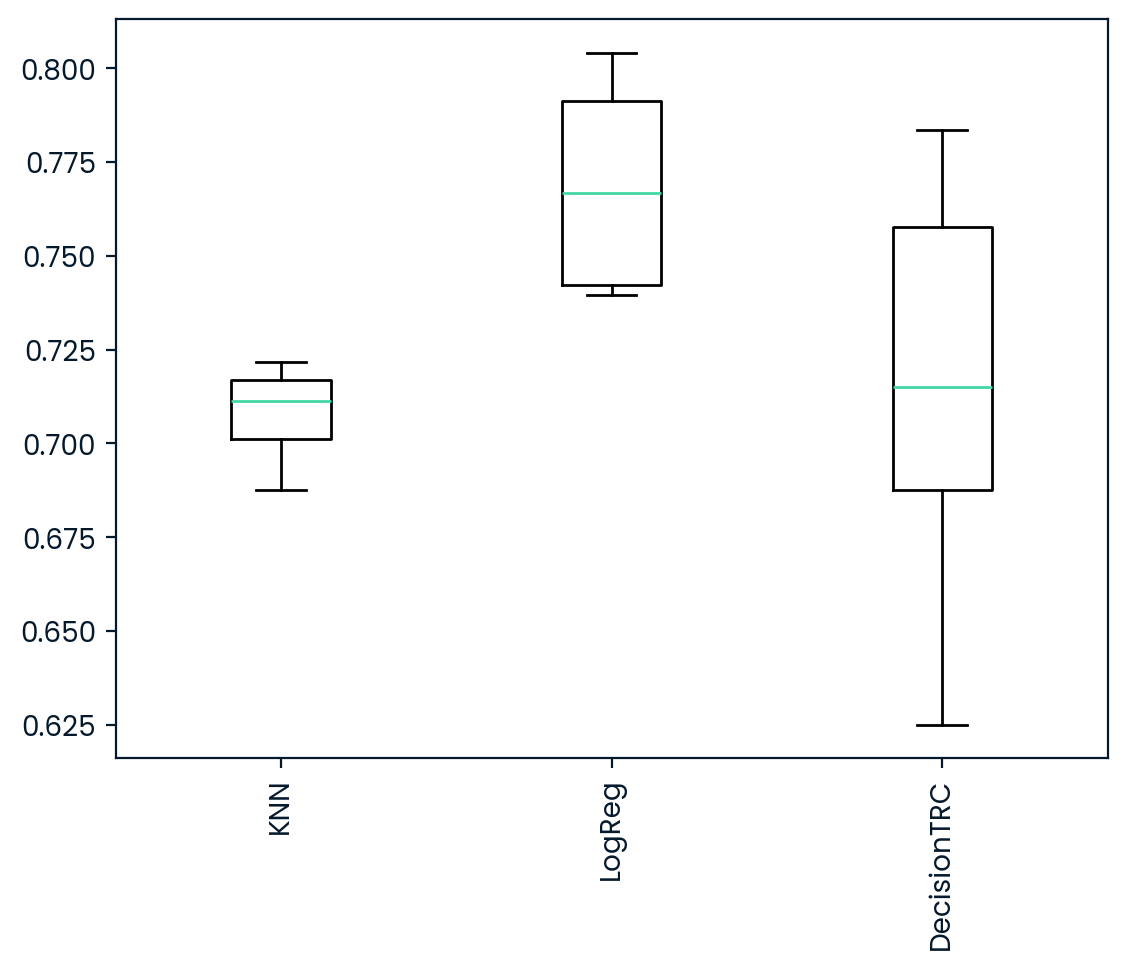

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

#X = data.drop(["Outcome", "Pregnancies"], axis=1).values.reshape(-1,7)
X = data[["Glucose", "BMI", "Age"]].values.reshape(-1,3)
#X = data[["Glucose"]].values.reshape(-1,1)
y = data['Outcome'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# This StandardScaler had no effect
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

models = { "KNN": KNeighborsClassifier(n_neighbors=5),
          "LogReg": LogisticRegression(),
          "DecisionTRC": DecisionTreeClassifier(max_depth=6, random_state=21)
         }
results = []

# Loop through the models' values
for name, model in models.items():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
          
  # Append the results
  results.append(cv_scores)

  # Fit the model to the training data
  model.fit(X_train, y_train)
    
  # Make predictions on the test set
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  # Calculate metrics
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  confusion_mat = confusion_matrix(y_test, y_pred)

  # Calculating ROC and AUC 
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
  roc_auc = auc(fpr, tpr)

  print(f"{name}: Accuracy mean cross-validation:", cv_scores.mean())
  print(f"{name}: Accuracy:", accuracy_score(y_test, y_pred))
  print(f"{name}: Precision:", precision)
  print(f"{name}: Recall:", recall)
  print(f"{name}: F1-Score:", f1)
  print(f"{name}: Confusion Matrix:\n", confusion_mat)
  print(f"{name}: ROC AUC:", roc_auc, "\n")

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.xticks(rotation=90)
plt.show()


## Hyperparameter

### LogisticRegression hyperparameter attempt
The results were not satisfied. The next one is better.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score

# Criando um modelo de regressão logística
model = LogisticRegression(solver='liblinear')  # Adicionando solver para suportar 'l1' penalty

# Definindo o espaço de busca dos hiperparâmetros
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2']}

# Criando um objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Ajustando o modelo aos dados
grid.fit(X_train, y_train)

# Obtendo os melhores parâmetros
best_params = grid.best_params_

# Extract the best estimator
best_model = grid.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

y_pred = best_model.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

name = "Logistic Regression"

accuracy = accuracy_score(y_test, y_pred)

# Store metrics in a dictionary for better organization
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Confusion Matrix": confusion_mat,
    "AUC": roc_auc
}

metrics

{'Accuracy': 0.7931034482758621,
 'Precision': 0.8108108108108109,
 'Recall': 0.5660377358490566,
 'F1-Score': 0.6666666666666666,
 'Confusion Matrix': array([[85,  7],
        [23, 30]]),
 'AUC': 0.8441345365053323}

### Best Model - DecisionTreeClassifier / GridSearchCV
After apply the GridSearchCV. The best parameters were found to DecisionTreeClassifier:
- Best Parameters:  {'max_depth': 4, 'min_samples_leaf': 0.1}

In [22]:
from sklearn.tree import DecisionTreeClassifier
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define params_dt
params_dt = {"max_depth": [2, 3, 4, 6, 8], "min_samples_leaf": [0.10, 0.14, 0.16, 0.28]}

model = DecisionTreeClassifier()

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=model,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)


#X = data.drop(["Outcome", "Pregnancies"], axis=1).values.reshape(-1,7)
X = data[["Glucose", "BMI", "Age"]].values.reshape(-1,3)
#X = data[["Glucose"]].values.reshape(-1,1)
y = data['Outcome'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)
# StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Assuming grid_dt is a GridSearchCV object and has been fitted
grid_dt.fit(X_train, y_train)

# Print best parameters
print("Best Parameters: ", grid_dt.best_params_)
# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

y_pred = best_model.predict(X_test)


# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

name = "Decision Tree Classifier"

# Printing metrics
print(f"{name}: Acurácia:", accuracy_score(y_test, y_pred))
print(f"{name}: Precisão:", precision)
print(f"{name}: Recall:", recall)
print(f"{name}: F1-Score:", f1)
print(f"{name}: Confusing Matrix:\n", confusion_mat)
print(f"{name}: ROC AUC:", roc_auc, "\n")

model_selected = best_model

Best Parameters:  {'max_depth': 6, 'min_samples_leaf': 0.1}
Decision Tree Classifier: Acurácia: 0.8413793103448276
Decision Tree Classifier: Precisão: 0.7884615384615384
Decision Tree Classifier: Recall: 0.7735849056603774
Decision Tree Classifier: F1-Score: 0.780952380952381
Decision Tree Classifier: Confusing Matrix:
 [[81 11]
 [12 41]]
Decision Tree Classifier: ROC AUC: 0.8441345365053323 



### Ada Boost / DecisionTreeClassifier
Another attempt using Ada Boot with DecisionTreeClassifier, with the Best Parameters identified in previews step:  {'max_depth': 4, 'min_samples_leaf': 0.1}
The performance was worse than the previews model.

In [13]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.1, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(estimator=dt, n_estimators=180, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
# y_pred_proba = ada.predict_proba(X_test)[:,1]

y_pred = ada.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

name = "Decision Tree Classifier (ada boot)"

print(f"{name}: Accuracy:", accuracy_score(y_test, y_pred))
print(f"{name}: Precision:", precision)
print(f"{name}: Recall:", recall)
print(f"{name}: F1-Score:", f1)
print(f"{name}: Confusing Matrix:\n", confusion_mat)
print(f"{name}: AUC:", roc_auc, "\n")

Decision Tree Classifier (ada boot): Accuracy: 0.7724137931034483
Decision Tree Classifier (ada boot): Precision: 0.7272727272727273
Decision Tree Classifier (ada boot): Recall: 0.6037735849056604
Decision Tree Classifier (ada boot): F1-Score: 0.6597938144329897
Decision Tree Classifier (ada boot): Confusing Matrix:
 [[80 12]
 [21 32]]
Decision Tree Classifier (ada boot): AUC: 0.8441345365053323 



# Prediction a patient case
Finally we can apply our best model **DecisionTreeClassifier** to predict what's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes.

In [14]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score

weight = 96
height = 1.78

# Calculating BMI
BMI = weight / height**2

# Define a DataFrame to test
test_risk = pd.DataFrame({"Glucose": [125], "BMI": [BMI], "Age": [54] })

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(test_risk)[:,1]

y_pred = best_model.predict(test_risk)

print("Patient:")
print(f"\tBMI: {round(BMI, 2)} \n\tAge: 54 \n\tGlucose: 125")
print("\nPrediction:")
print("\tResult of y_pred: ", round(y_pred[0], 2))
print("\tResult of y_pred_proba: ", round(y_pred_proba[0], 2))

Patient:
	BMI: 30.3 
	Age: 54 
	Glucose: 125

Prediction:
	Result of y_pred:  1
	Result of y_pred_proba:  0.57


# Conclusion
In the case provided, the model identified a 54% probability of the individual having diabetes, according to the model's estimate.

We can also state that the applied DecisionTreeClassifier model is quite accurate and can predict whether an individual has diabetes with an precision rate of 78%.